Imports

In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 %matplotlib inline
 import seaborn as sns


In [2]:
df=pd.read_csv('/content/uber.csv')

In [3]:
df.shape

(200000, 9)

In [4]:
df.head().style.background_gradient(cmap='cool')

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.500000,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.700000,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.900000,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.300000,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.000000,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [14]:
# import numpy as np

def haversine_arcsin(lon_1, lon_2, lat_1, lat_2):
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  # Convert degrees to radians

    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1

    # Haversine formula using arcsin
    a = np.sin(diff_lat / 2.0) ** 2 + np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon / 2.0) ** 2
    km = 2 * 6371 * np.arcsin(np.sqrt(a))  # Multiply by Earth's radius in kilometers

    return km



In [46]:
# import numpy as np

def euclidean_distance(lon1, lon2, lat1, lat2):
    """
    Calculates the Euclidean distance between two points given their
    longitude and latitude coordinates.

    Args:
        lon1: Longitude of the first point.
        lon2: Longitude of the second point.
        lat1: Latitude of the first point.
        lat2: Latitude of the second point.

    Returns:
        The Euclidean distance between the two points.
    """
    dist = np.sqrt((lon2 - lon1)**2 + (lat2 - lat1)**2)
    return dist

In [47]:
df['Distance'] = euclidean_distance(df['pickup_longitude'], df['dropoff_longitude'], df['pickup_latitude'], df['dropoff_latitude'])

In [48]:
#rounding it off to 2 decimal places
df['Distance']=df['Distance'].astype(float).round(2)

In [49]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,0.02
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,0.02
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,0.05
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,0.02
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,0.05


Text(0, 0.5, 'fare_amount')

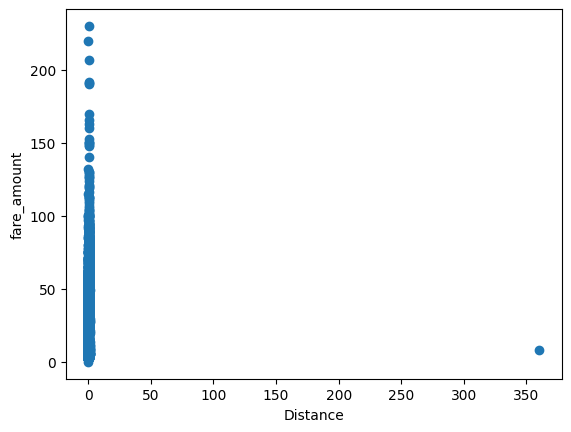

In [50]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('fare_amount')

In [51]:
#Removing Outliers
df.drop(df[(df['fare_amount']==0) | (df['fare_amount']<0)].index , inplace=True) # Changed 'or' to '|' for element-wise comparison
df.drop(df[df['Distance']==0].index,inplace=True)

In [52]:
df.shape

(188115, 10)

In [53]:
#Removing outliers with non-plausible fare amounts
df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index,inplace=True)
df.drop(df[(df['fare_amount']<100) & df['Distance']>100].index,inplace=True)

In [54]:
df.shape

(188068, 10)

Text(0, 0.5, 'fare_amount')

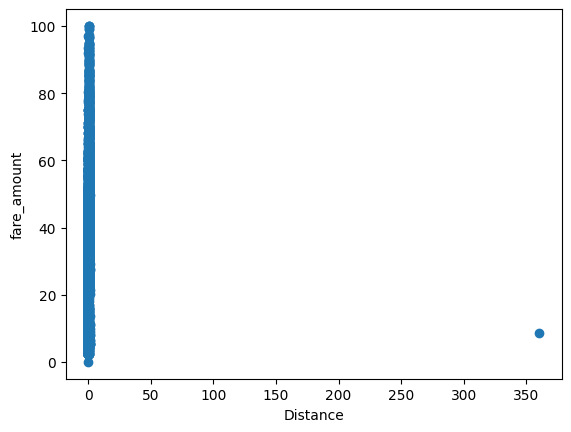

In [55]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('fare_amount')

In [56]:
df.drop(df[df['Distance']>100].index,inplace=True)

Text(0, 0.5, 'fare_amount')

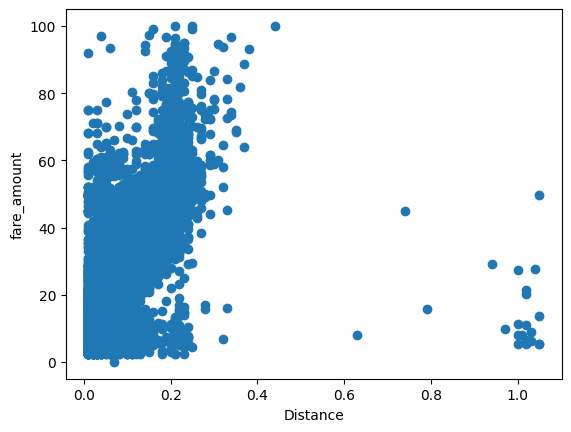

In [57]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('fare_amount')

In [58]:
df.shape

(188067, 10)

In [59]:
#creating a new dataframe of specific column
df2=pd.DataFrame().assign(fare=df['fare_amount'],distance=df['Distance'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188067 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   fare      188067 non-null  float64
 1   distance  188067 non-null  float64
dtypes: float64(2)
memory usage: 4.3 MB


<ipython-input-60-0f7a09e5b5c1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['fare'],color='g',hist_kws=dict(edgecolor="black",linewidth=2),bins=30)


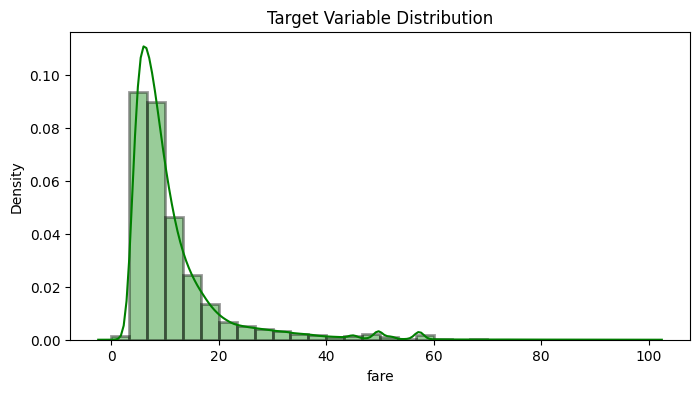

In [60]:
#plot target fare distribution
plt.figure(figsize=[8,4])
sns.distplot(df2['fare'],color='g',hist_kws=dict(edgecolor="black",linewidth=2),bins=30)
plt.title("Target Variable Distribution")
plt.show()

Linear Regression

In [61]:
x=df2['fare']
y=df2['distance']

In [62]:
X=df2['distance'].values.reshape(-1,1)
Y=df2['fare'].values.reshape(-1,1)

In [63]:
#scale by standard scaler
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
y_std=std.fit_transform(Y)
x_std=std.fit_transform(X)

In [64]:
#split in train test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_std,y_std,test_size=0.2,random_state=0)

In [65]:
#simple linear regression
from sklearn.linear_model import LinearRegression
l_reg=LinearRegression()
l_reg.fit(X_train,y_train)

LinearRegression()

In [66]:
#predict test values
y_pred=l_reg.predict(X_test)

In [67]:
#find the error
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Sqaured Error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

Mean Absolute Error:  0.24736597548195888
Mean Sqaured Error:  0.20656291750753022
Root Mean Squared Error:  0.45449193338004384
R2 Score:  0.7931627496014781


Random forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)  # You can adjust hyperparameters like n_estimators

# Fit the model to the training data
rf_reg.fit(X_train, y_train.ravel())  # Ravel y_train to avoid a warning

# Predict on the test data
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
print("Random Forest Regressor Performance:")
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", metrics.r2_score(y_test, y_pred_rf))

Random Forest Regressor Performance:
Mean Absolute Error: 0.23807389881036975
Mean Squared Error: 0.16516979191473827
Root Mean Squared Error: 0.40641086589157316
R2 Score: 0.8346108487391254
